In [1]:
import pandas as pd           # For data manipulation
import numpy as np            # For numerical analysis
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno      # For visualizing missing values

# Scikit-learn libraries
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import pickle                 # For saving/loading model


In [203]:
df = pd.read_csv("dataset/kidney_disease.csv")

In [204]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [186]:
df.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [205]:
df.columns = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
    'pedal_edema', 'anemia', 'classification', 'id'
]


In [188]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification', 'id'],
      dtype='object')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   blood_pressure           391 non-null    float64
 2   specific_gravity         388 non-null    float64
 3   albumin                  353 non-null    float64
 4   sugar                    354 non-null    float64
 5   red_blood_cells          351 non-null    float64
 6   pus_cell                 248 non-null    object 
 7   pus_cell_clumps          335 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     396 non-null    object 
 10  blood_urea               356 non-null    float64
 11  serum_creatinine         381 non-null    float64
 12  sodium                   383 non-null    float64
 13  potassium                313 non-null    float64
 14  hemoglobin               3

In [190]:
df.isnull().any()

age                        False
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
classification              True
id                         False
dtype: bool

In [24]:
# Checking the shape and data type info
print("Shape of the dataset:", df.shape)
print("\nData Type Info:")
df.info()


Shape of the dataset: (400, 26)

Data Type Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   blood_pressure           391 non-null    float64
 2   specific_gravity         388 non-null    float64
 3   albumin                  353 non-null    float64
 4   sugar                    354 non-null    float64
 5   red_blood_cells          351 non-null    float64
 6   pus_cell                 248 non-null    object 
 7   pus_cell_clumps          335 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     396 non-null    object 
 10  blood_urea               356 non-null    float64
 11  serum_creatinine         381 non-null    float64
 12  sodium                   383 non-null    float64
 13  potassium                313 no

In [191]:
print(df.isnull().sum())


age                          0
blood_pressure               9
specific_gravity            12
albumin                     47
sugar                       46
red_blood_cells             49
pus_cell                   152
pus_cell_clumps             65
bacteria                     4
blood_glucose_random         4
blood_urea                  44
serum_creatinine            19
sodium                      17
potassium                   87
hemoglobin                  88
packed_cell_volume          52
white_blood_cell_count      70
red_blood_cell_count       105
hypertension               130
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     2
pedal_edema                  1
anemia                       1
classification               1
id                           0
dtype: int64


In [192]:
numerical_cols = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
    'red_blood_cell_count', 'blood_glucose_random'
]


In [193]:
categorical_cols = [
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
    'appetite', 'pedal_edema', 'anemia'
]



In [194]:
target_col = 'classification'



In [206]:
target_col = 'classification'
print(df['classification'].unique())



['no' 'yes' nan]


In [199]:
# Convert numeric-looking object columns to float
for col in ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'blood_glucose_random']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Standardize any spaces/tabs (just in case)
df['classification'] = df['classification'].str.strip().str.lower()

# Map 'yes' → 1, 'no' → 0
df['classification'] = df['classification'].map({'yes': 1, 'no': 0})

# Verify result
print(df['classification'].value_counts())



classification
0    339
1     60
Name: count, dtype: int64


In [208]:
print(df[['classification', 'age', 'blood_urea', 'serum_creatinine', 'hemoglobin']].head(10))


KeyError: "['classification', 'blood_urea', 'serum_creatinine', 'hemoglobin'] not in index"

In [197]:
print(df['classification'].unique())



['no' 'yes']


In [36]:
# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:\n", cat_cols)

# Print unique class values in each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(Counter(df[col]))

Categorical Columns:
 Index(['pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification', 'id'],
      dtype='object')

Column: pus_cell
Counter({'normal': 352, 'abnormal': 47})

Column: pus_cell_clumps
Counter({'normal': 323, 'abnormal': 76})

Column: bacteria
Counter({'notpresent': 357, 'present': 42})

Column: hypertension
Counter({'5.2': 148, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '5.8': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})

Column: diabetes_mellitus
Counter({'no': 252, 'yes': 14

In [38]:
# Safely modify values using .loc[]
df.loc[:, 'hypertension'] = pd.to_numeric(df['hypertension'], errors='coerce')
df.loc[:, 'diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df.loc[:, 'coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df.loc[:, 'appetite'] = df['appetite'].replace({'\tno': 'no'})
df.loc[:, 'id'] = df['id'].replace({'ckd\t': 'ckd'})



In [63]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns (text class)
catcols = ['anemia', 'pedal_edema', 'appetite', 'bacteria', 'classification',
           'coronary_artery_disease', 'diabetes_mellitus', 'hypertension',
           'pus_cell', 'pus_cell_clumps', 'red_blood_cells']

for col in catcols:
    print("LABEL ENCODING OF:", col)
    
    le = LabelEncoder()
    
    print(dict(df[col].value_counts()))  # Before encoding
    df.loc[:, col] = le.fit_transform(df[col].astype(str))  # Encode with .loc
    print(dict(df[col].value_counts()))  # After encoding
    print("*" * 100)


LABEL ENCODING OF: anemia
{0: np.int64(323), 1: np.int64(76)}
{0: np.int64(323), 1: np.int64(76)}
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
{0: np.int64(317), 1: np.int64(82)}
{0: np.int64(317), 1: np.int64(82)}
****************************************************************************************************
LABEL ENCODING OF: appetite
{0: np.int64(365), 1: np.int64(34)}
{0: np.int64(365), 1: np.int64(34)}
****************************************************************************************************
LABEL ENCODING OF: bacteria
{0: np.int64(357), 1: np.int64(42)}
{0: np.int64(357), 1: np.int64(42)}
****************************************************************************************************
LABEL ENCODING OF: classification
{0: np.int64(339), 1: np.int64(60)}
{0: np.int64(339), 1: np.int64(60)}
*****************************************************************************************

In [41]:
print(df['red_blood_cells'].value_counts())

red_blood_cells
0.0    338
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64


In [42]:
# Step 1: Identify Continuous (Numerical) Columns
contcols = list(df.dtypes[df.dtypes != 'O'].index.values)  # Only float and int types
print("All Continuous Columns:")
print(contcols)


All Continuous Columns:
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension']


In [43]:
# Step 2: Print Unique Values for Each Numerical Column
for i in contcols:
    print("Continuous Column:", i)
    print(df[i].unique())
    print("*" * 120)

Continuous Column: age
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

In [64]:
# For continuous numerical columns
print("Descriptive statistics for numerical columns:")
print(df[contcols].describe())



Descriptive statistics for numerical columns:
              age  blood_pressure  specific_gravity     albumin       sugar  \
count  399.000000      399.000000        399.000000  399.000000  399.000000   
mean   199.263158       51.424437         76.510348    1.017401    1.019498   
std    115.662255       16.955249         13.467877    0.005375    1.272892   
min      0.000000        2.000000         50.000000    1.005000    0.000000   
25%     99.500000       42.000000         70.000000    1.015000    0.000000   
50%    199.000000       54.000000         80.000000    1.017408    1.000000   
75%    299.500000       64.000000         80.000000    1.020000    2.000000   
max    399.000000       90.000000        180.000000    1.025000    5.000000   

       red_blood_cells  blood_urea  serum_creatinine      sodium   potassium  \
count       399.000000  399.000000        399.000000  399.000000  399.000000   
mean          0.395990  148.131846         57.444333    3.078400  137.535092   
st

In [45]:
# For categorical columns
print("Descriptive statistics for categorical columns:")
print(df.describe(include='object'))


Descriptive statistics for categorical columns:
        pus_cell  pus_cell_clumps  bacteria  diabetes_mellitus  \
count        399              399       399                399   
unique         2                2         2                  2   
top            1                1         0                  0   
freq         352              323       357                252   

        coronary_artery_disease  appetite  pedal_edema  anemia  \
count                       399       399          399     399   
unique                        2         2            2       2   
top                           0         0            0       0   
freq                        262       365          317     323   

        classification   id  
count              399  399  
unique               2    2  
top                  0  ckd  
freq               339  250  


In [46]:
for col in catcols:
    print(f"\nValue counts of {col}:")
    print(df[col].value_counts())
    print("*" * 40)



Value counts of anemia:
anemia
0    323
1     76
Name: count, dtype: int64
****************************************

Value counts of pedal_edema:
pedal_edema
0    317
1     82
Name: count, dtype: int64
****************************************

Value counts of appetite:
appetite
0    365
1     34
Name: count, dtype: int64
****************************************

Value counts of bacteria:
bacteria
0    357
1     42
Name: count, dtype: int64
****************************************

Value counts of classification:
classification
0    339
1     60
Name: count, dtype: int64
****************************************

Value counts of coronary_artery_disease:
coronary_artery_disease
0    262
1    137
Name: count, dtype: int64
****************************************

Value counts of diabetes_mellitus:
diabetes_mellitus
0    252
1    147
Name: count, dtype: int64
****************************************

Value counts of hypertension:
hypertension
30.0    148
23.0     16
27.0     14
25.0     11

In [47]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,199.263158,51.424437,76.510348,1.017401,1.019498,0.395990,148.131846,57.444333,3.078400,137.535092,4.626309,12.521992,38.881703,8406.388420,26.671679
std,115.662255,16.955249,13.467877,0.005375,1.272892,1.041155,74.852185,49.346358,5.623282,9.214955,2.823261,2.718124,8.161123,2526.382247,8.647187
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,0.000000
25%,99.500000,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,6950.000000,23.000000
50%,199.000000,54.000000,80.000000,1.017408,1.000000,0.000000,127.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,30.000000
75%,299.500000,64.000000,80.000000,1.020000,2.000000,0.000000,150.000000,62.500000,3.072454,141.000000,4.800000,14.650000,44.000000,9400.000000,30.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,45.000000


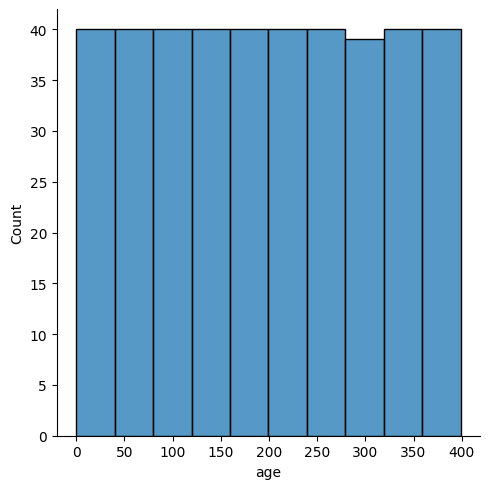

In [49]:
sns.displot(df.age)

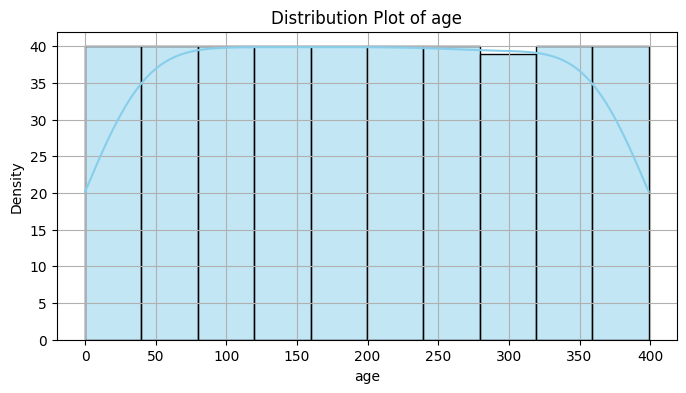

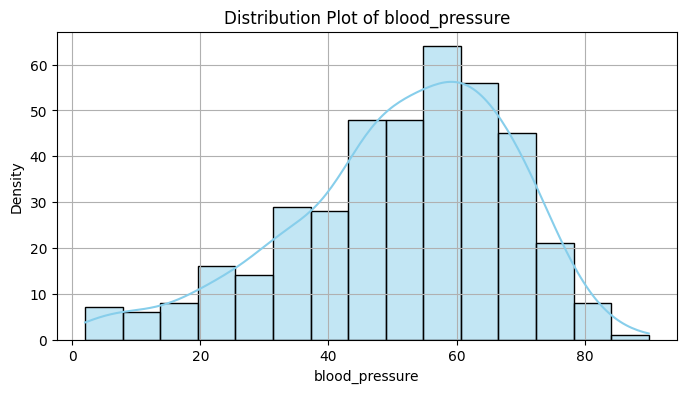

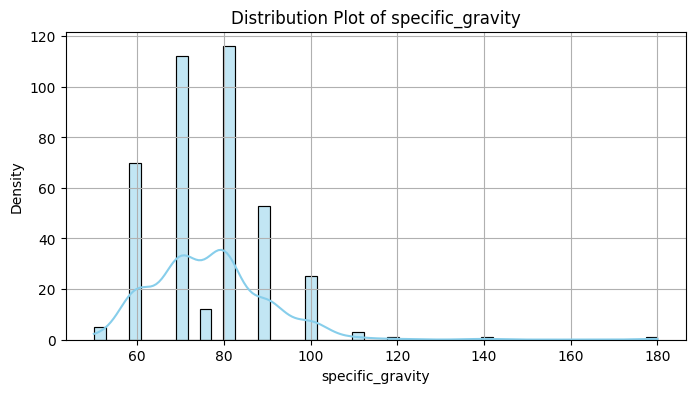

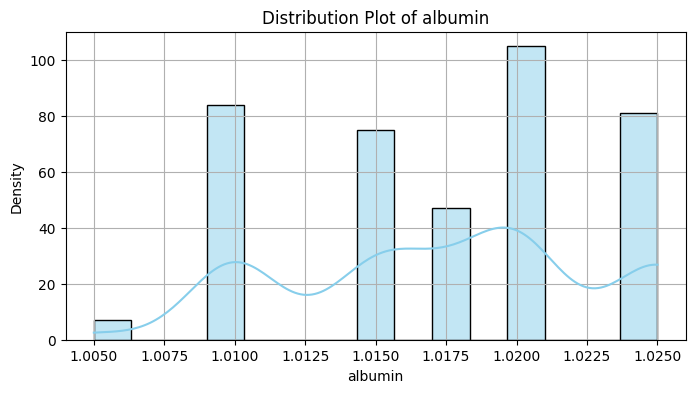

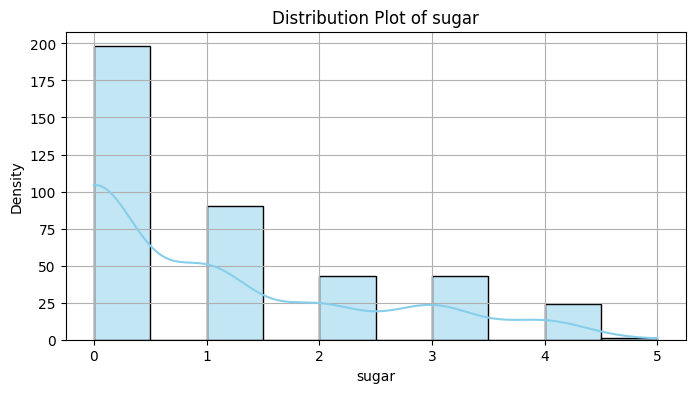

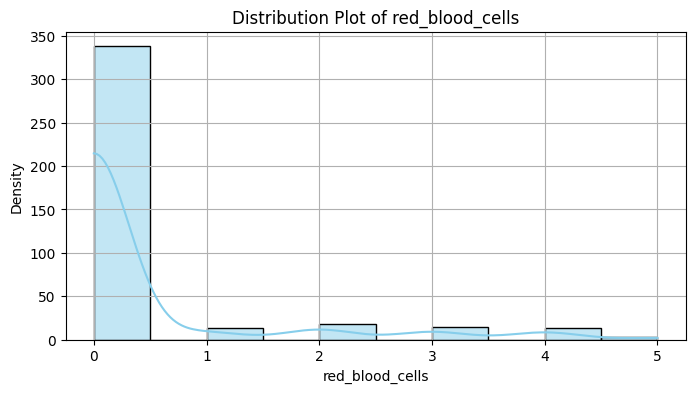

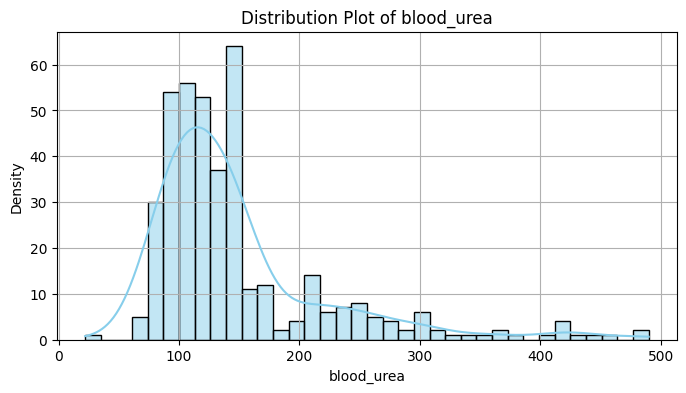

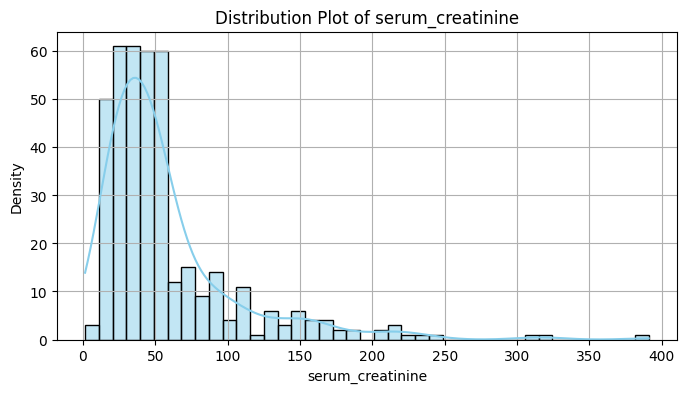

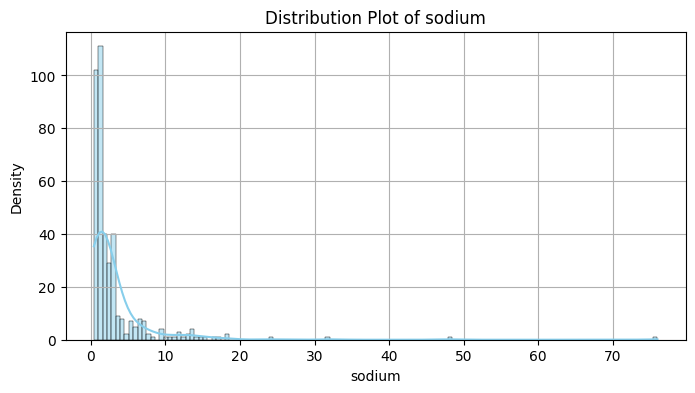

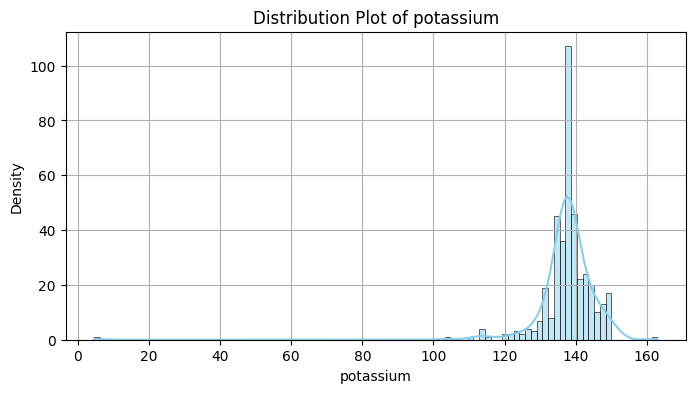

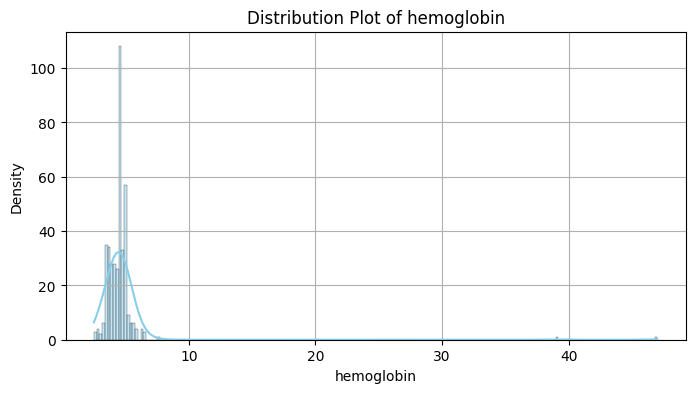

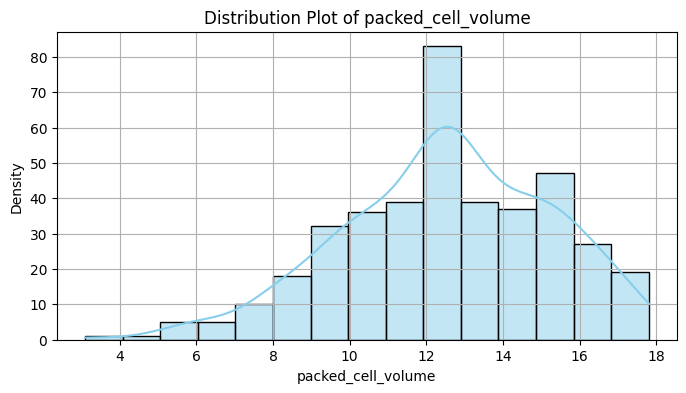

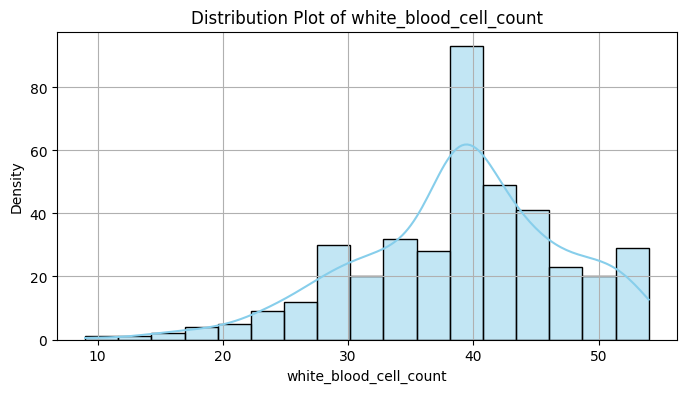

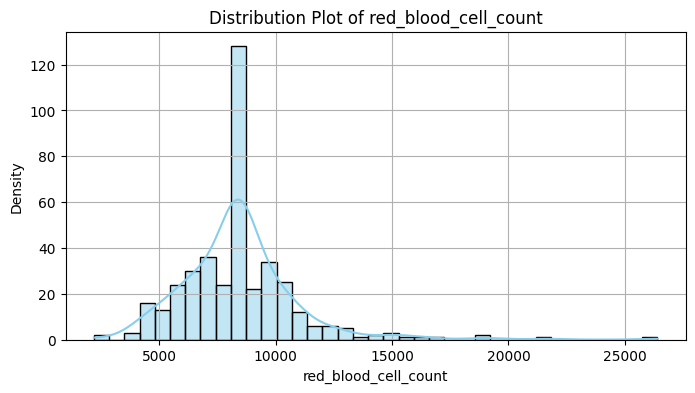

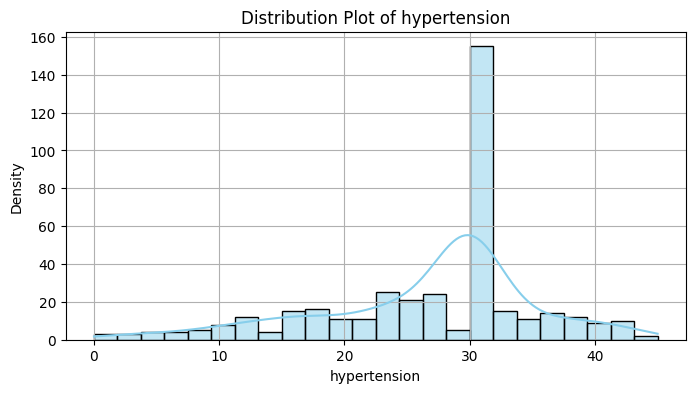

In [50]:
#Distribution Plot for Numerical Columns (distplot)
for col in contcols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


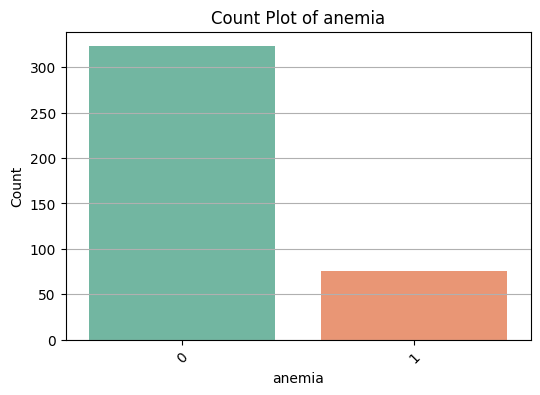

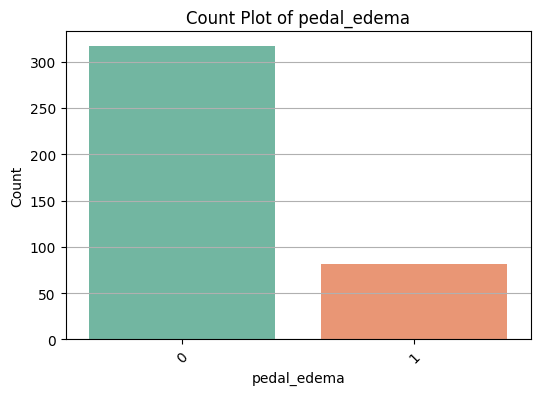

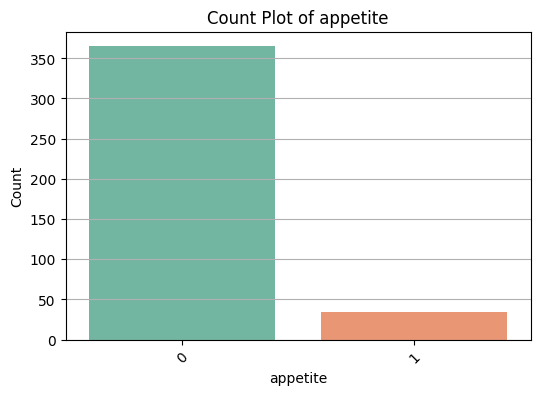

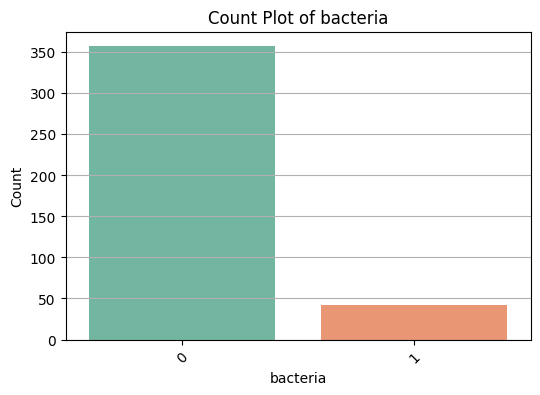

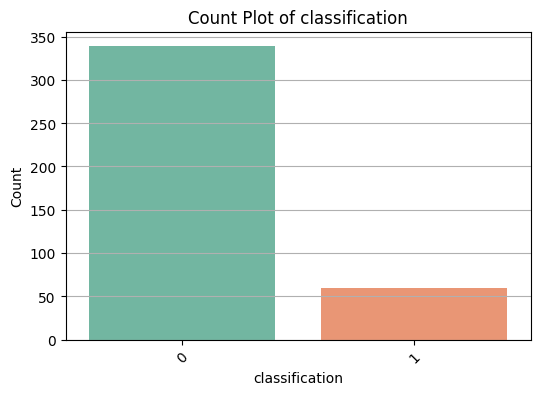

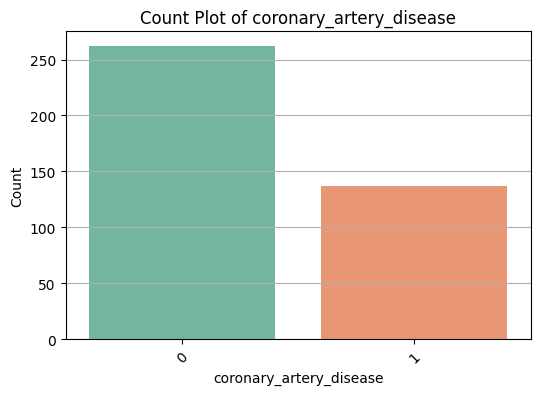

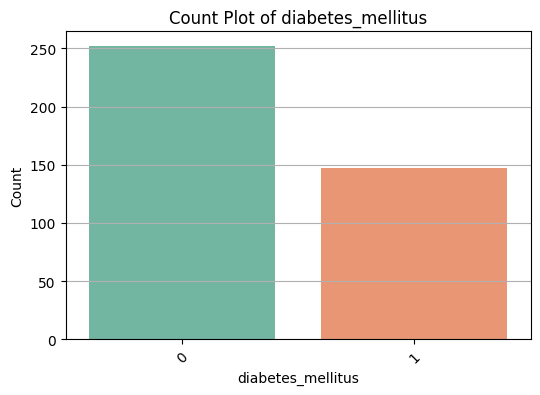

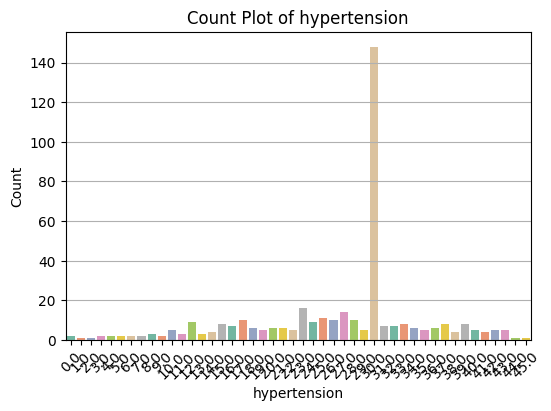

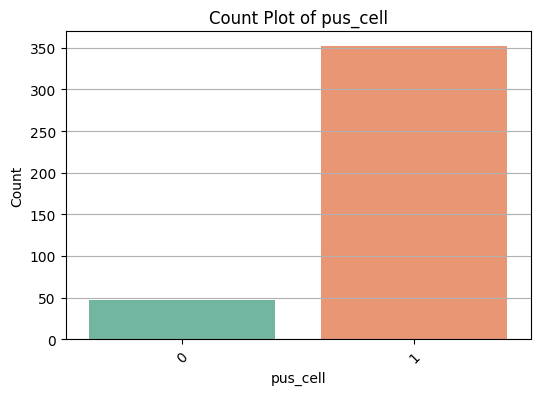

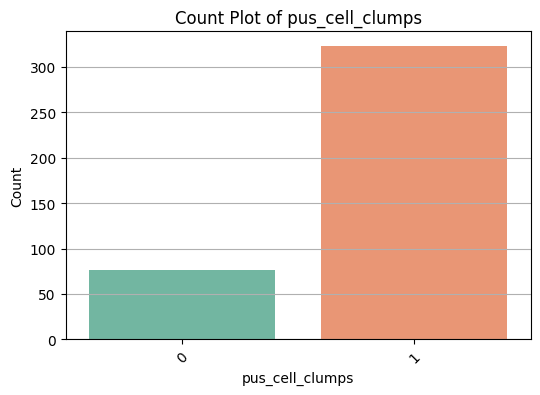

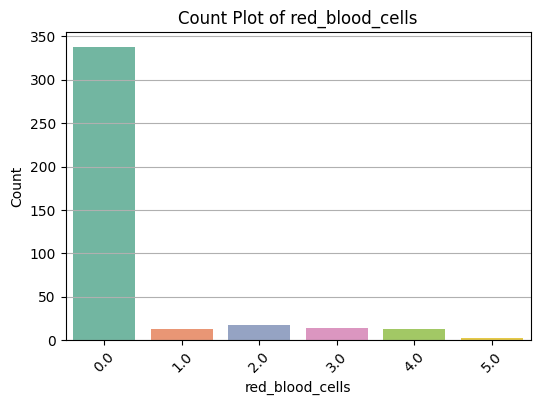

In [52]:
#Count Plot for Categorical Columns (countplot)
for col in catcols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()



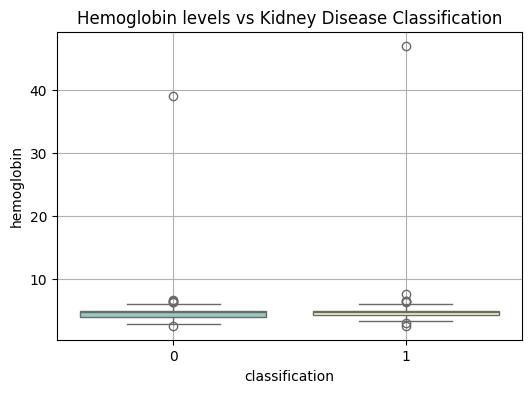

In [59]:
# Boxplot: Numerical vs Categorical
plt.figure(figsize=(6, 4))
sns.boxplot(x='classification', y='hemoglobin', data=df, hue='classification', palette='Set3', legend=False)
plt.title('Hemoglobin levels vs Kidney Disease Classification')
plt.grid()
plt.show()

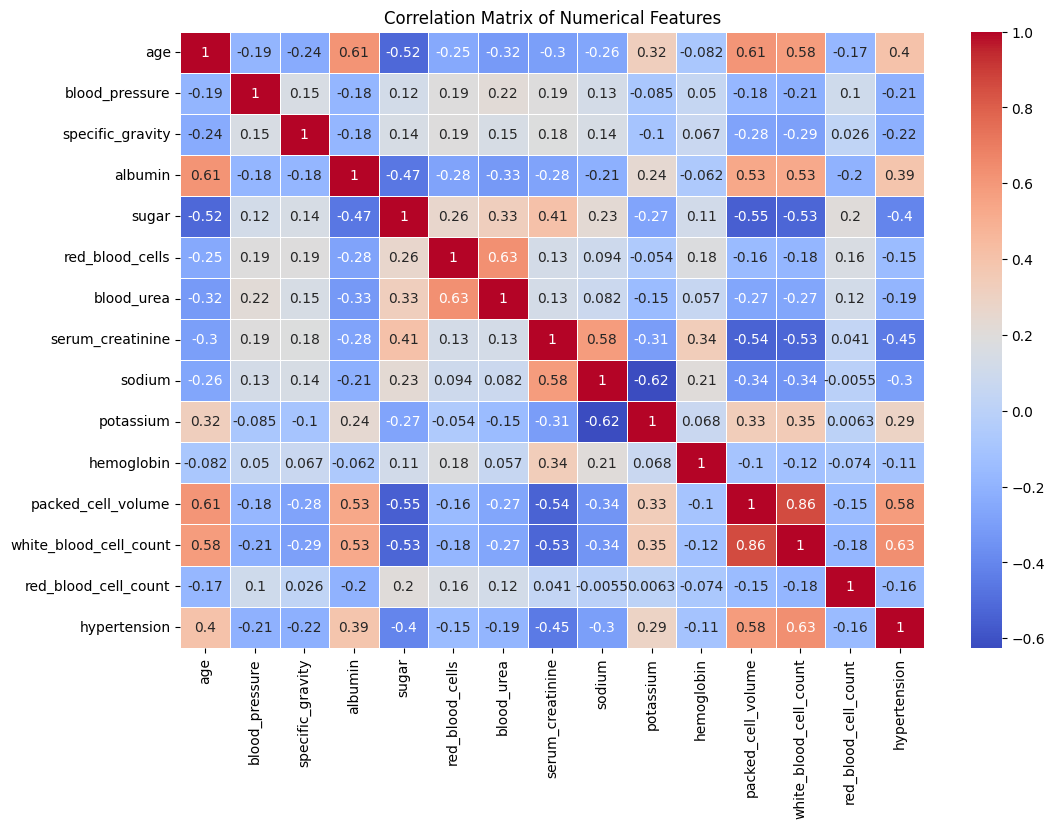

In [56]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

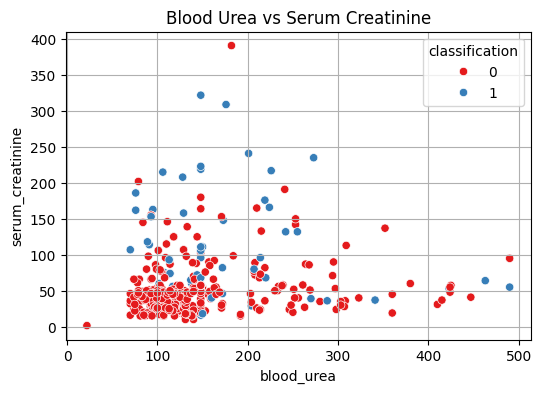

In [57]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='blood_urea', y='serum_creatinine', data=df, hue='classification', palette='Set1')
plt.title('Blood Urea vs Serum Creatinine')
plt.grid()
plt.show()

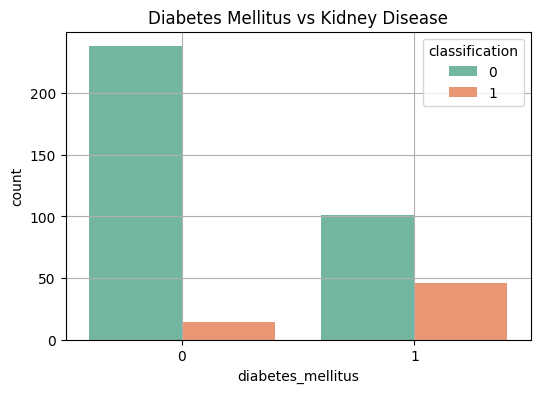

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes_mellitus', hue='classification', data=df, palette='Set2')
plt.title('Diabetes Mellitus vs Kidney Disease')
plt.grid()
plt.show()

In [60]:
# Multivariate Analysis
# Find all numeric columns except 'age'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('age')  # We'll use age as the base for comparison

print("Numeric columns (excluding age):", numeric_cols)


Numeric columns (excluding age): ['blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension']


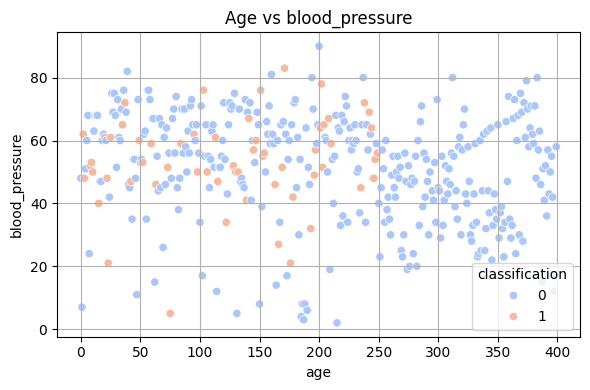

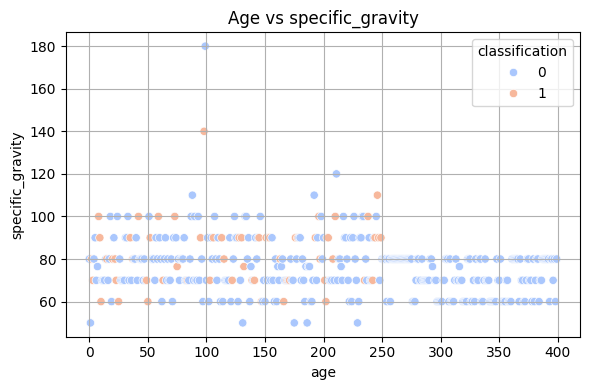

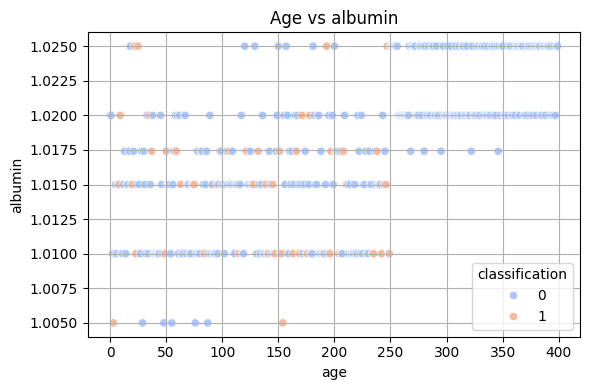

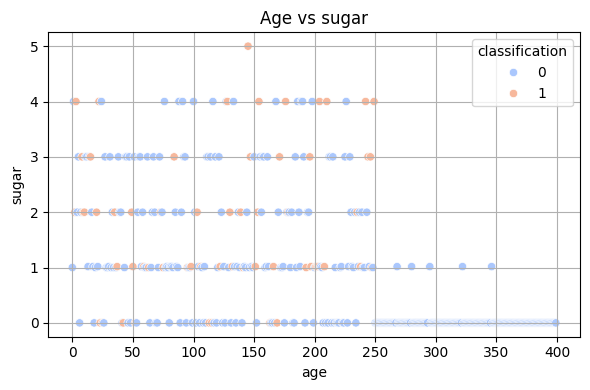

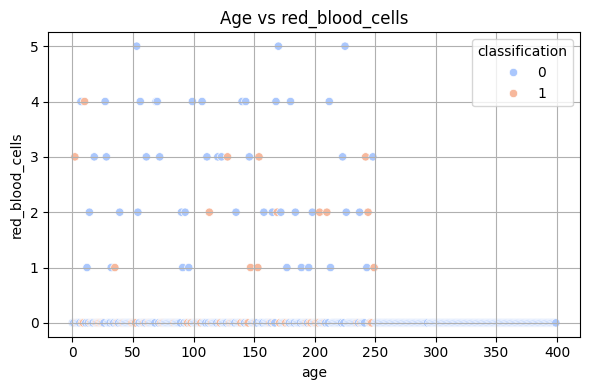

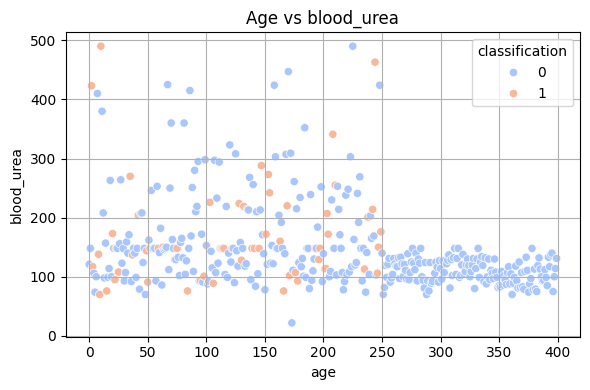

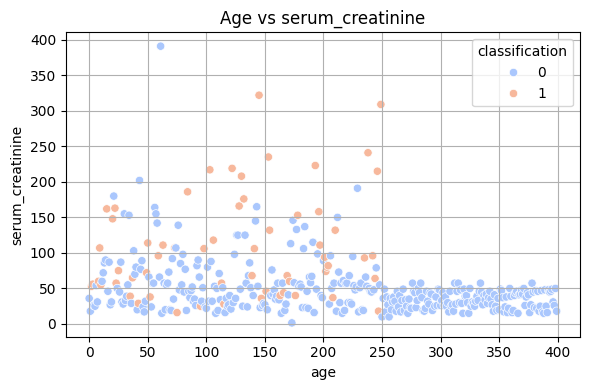

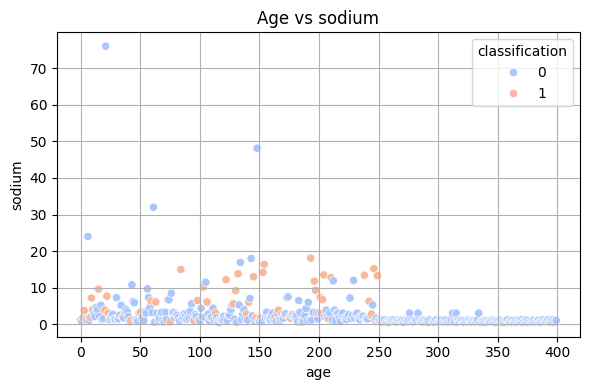

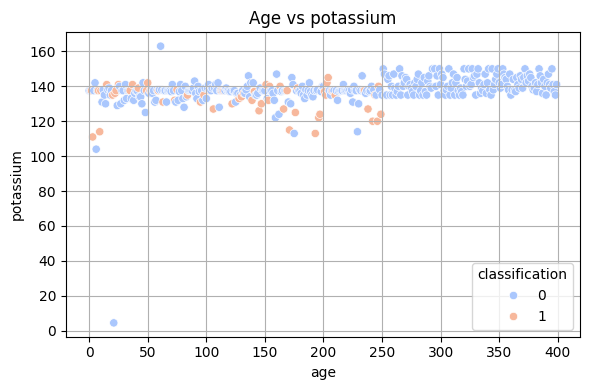

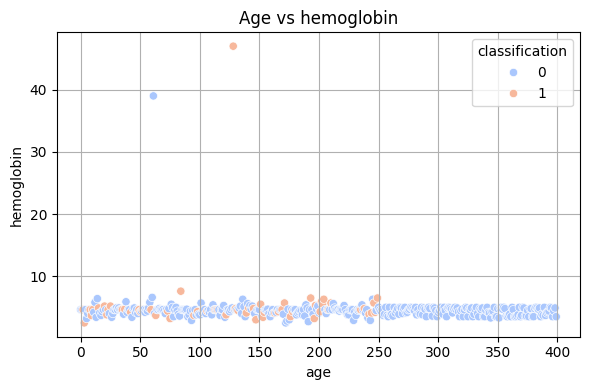

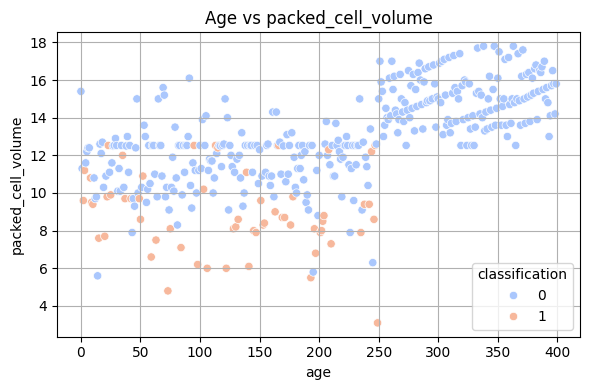

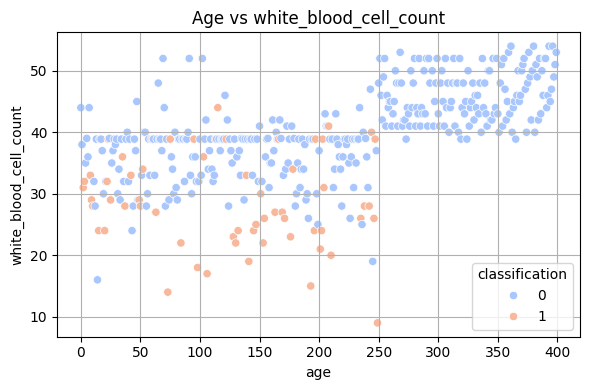

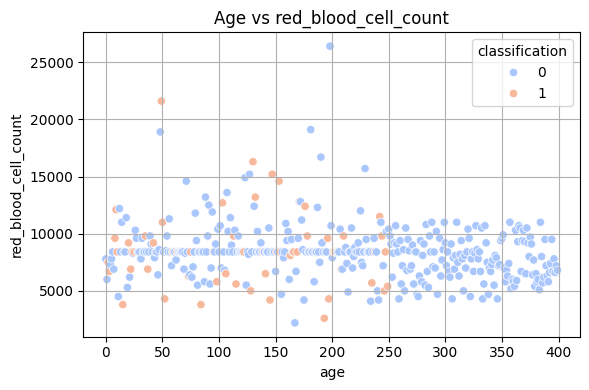

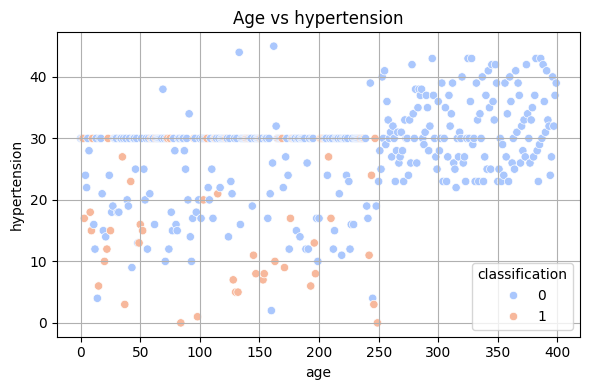

In [61]:
# Loop through all numeric columns and plot against age
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='age', y=col, data=df, hue='classification', palette='coolwarm')
    plt.title(f'Age vs {col}')
    plt.grid()
    plt.tight_layout()
    plt.show()

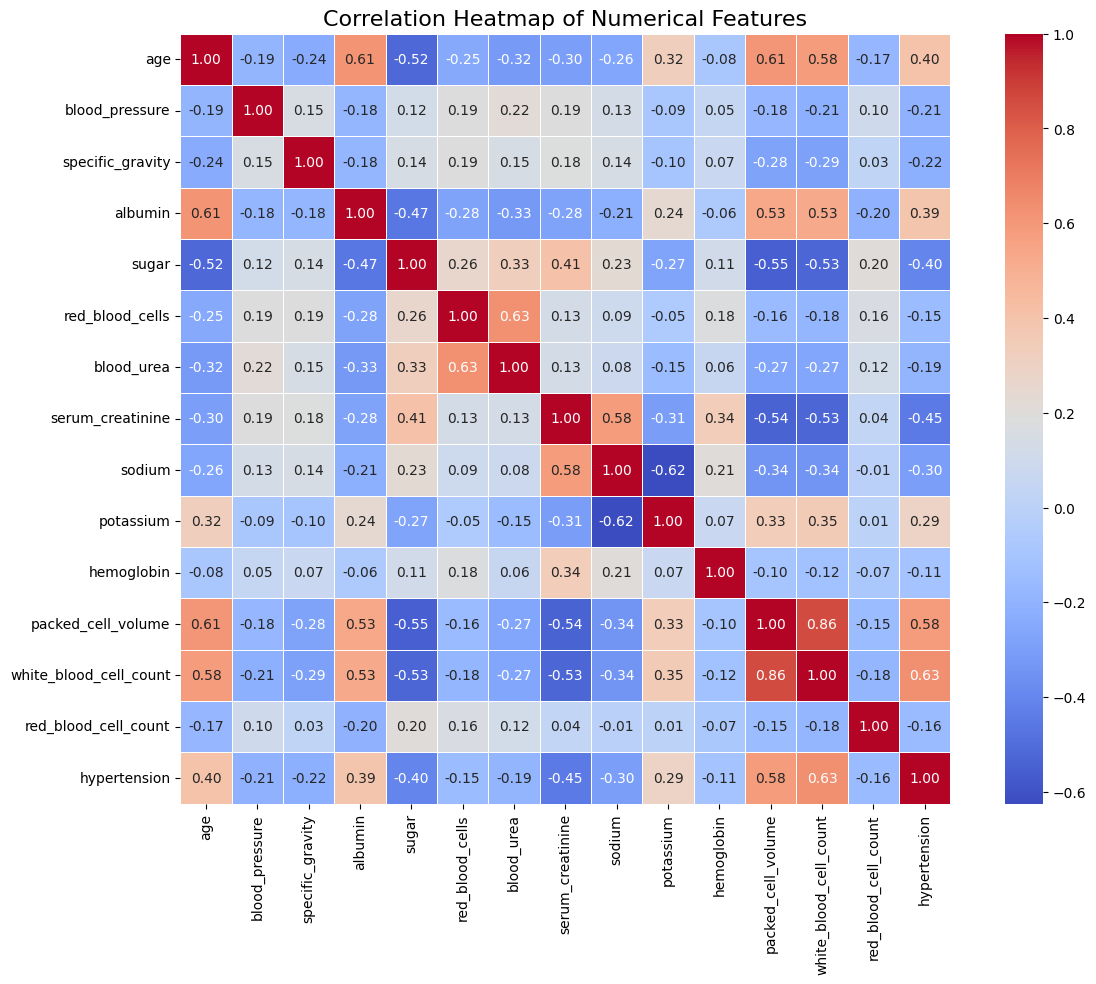

In [62]:
#find correlation between independent columns and visualize it using a heatmap with pandas and seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# 2. Set the plot size
plt.figure(figsize=(14, 10))

# 3. Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

# 4. Title and show
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


In [65]:
X = df.drop(['classification'], axis=1)
y = df['classification']


In [67]:
X.select_dtypes(include='object').columns


Index(['pus_cell', 'pus_cell_clumps', 'bacteria', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'id'],
      dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder
X=X.copy()
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)



In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [71]:
print(X_scaled.head())


        age  blood_pressure  specific_gravity   albumin     sugar  \
0 -1.724965       -0.202223          0.259435  0.484102 -0.015337   
1 -1.716308       -2.623389         -1.970885  0.484102  2.344459   
2 -1.707651        0.624517          0.259435 -1.378857  0.771262   
3 -1.698995       -0.202223         -0.484005 -2.310336  2.344459   
4 -1.690338       -0.025064          0.259435 -1.378857  0.771262   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_urea  ...  \
0        -0.380815  0.365408         0.485071 -0.342997   -0.362927  ...   
1        -0.380815  0.365408         0.485071 -0.342997   -0.001275  ...   
2         2.504218  0.365408         0.485071 -0.342997    3.676756  ...   
3        -0.380815  0.365408        -2.061553  2.915476   -0.416433  ...   
4        -0.380815  0.365408         0.485071 -0.342997   -0.563574  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0            1.060151                0.627943            

In [72]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (319, 24)
X_test shape: (80, 24)
y_train shape: (319,)
y_test shape: (80,)


In [74]:
#Step 1: Import Required Libraries
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/375.9 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 0.4/375.9 MB 5.5 MB/s eta 0:01:09
   ---------------------------------------- 0.6/375.9 MB 5.0 MB/s eta 0:01:16
   ---------------------------------------- 0.6/375.9 MB 3.7 MB/s eta 0:01:41
   ---------------------------------------- 0.6/375.9 MB 2.9 MB/s eta 0:02:11
   ---------------------------------------- 0.7/375.9 MB 2.7 MB/s eta 0:02:21
   ---------------------------------------- 0.9/375.9 MB 2.9 MB/s eta 0:02:09
   ---------------------------------------- 1.0/375.9 MB 2.8 MB/s eta 0:02:15
   ---------------------------------------- 1.2/375.9 MB 3.1 MB/s eta 0:0

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
#Step 2: Build the ANN Skeleton

# Initialize the ANN
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))

# Add second hidden layer
model.add(Dense(units=8, activation='relu'))

# Add output layer (binary classification => sigmoid)
model.add(Dense(units=1, activation='sigmoid'))


C:\Users\Disha Satpute\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
#Step 3: Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Step 4: Train the ANN
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,   # 20% of training data for validation
    batch_size=100,
    epochs=100,
    verbose=1               # Show training progress
)
#Notes:
#input_shape=(X_train.shape[1],) ensures the model knows how many input features to expect.
#activation='relu' for hidden layers (standard choice).
#sigmoid for the output layer for binary classification (0 or 1).
#The model is trained for 100 epochs with batch size = 100.

In [179]:
#Random Forest Model in Function Form

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Step 1: Define the function
def random_forest_model(X_train, X_test, y_train, y_test):
    # Step 2: Create and train the model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    
    # Step 3: Make predictions
    y_pred = rf.predict(X_test)
    
    # Step 4: Evaluate the model
    print("✅ Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n✅ Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return rf  # optional: return the trained model if needed later


In [ ]:
#Call the function:

rf_model = random_forest_model(X_train, X_test, y_train, y_test)


In [180]:
#Decision Tree Model Function

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Step 1: Define the function
def decision_tree_model(X_train, X_test, y_train, y_test):
    # Step 2: Create and train the model
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    
    # Step 3: Make predictions
    y_pred = dt.predict(X_test)
    
    # Step 4: Evaluate the model
    print("✅ Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n✅ Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return dt  # optional: return the trained model if needed later



In [ ]:
# call the function

dt_model = decision_tree_model(X_train, X_test, y_train, y_test)


In [80]:
#Logistic Regression Model Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Step 1: Define a function to build, train, and evaluate Logistic Regression
def logistic_regression_model(X_train, X_test, y_train, y_test):
    # Step 2: Initialize the model
    log_reg = LogisticRegression(max_iter=1000)  # increase max_iter if convergence warning occurs
    
    # Step 3: Fit the model to the training data
    log_reg.fit(X_train, y_train)
    
    # Step 4: Predict on test data
    y_pred = log_reg.predict(X_test)
    
    # Step 5: Evaluate the model
    print("✅ Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n✅ Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return log_reg  # return model if needed later


In [85]:
#Call the function to train and test:
logistic_model = logistic_regression_model(X_train, X_test, y_train, y_test)


✅ Confusion Matrix:
[[59  7]
 [ 5  9]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.56      0.64      0.60        14

    accuracy                           0.85        80
   macro avg       0.74      0.77      0.75        80
weighted avg       0.86      0.85      0.85        80



In [84]:
# Convert y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [87]:
# Save the trained ANN model
model.save("exit_prediction_ann_model.keras")  # ✅ Preferred format



In [89]:
#Load the saved model (for prediction)
from tensorflow.keras.models import load_model

model = load_model("exit_prediction_ann_model.keras")



In [149]:
def predict_exit(sample_value):
    # Drop 'id' from columns since we don't predict on it
    feature_columns = X_train.drop(columns=['id']).columns

    # Convert list to dataframe
    sample_df = pd.DataFrame([sample_value], columns=feature_columns)

    # Scale using the same scaler used during training
    scaled_sample = sc.transform(sample_df)

    # Predict using the trained ANN model
    prediction = model.predict(scaled_sample)

    return (prediction > 0.5).astype(int)


In [150]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [151]:
sample_input = [
    45,     # age
    80,     # blood_pressure
    1.020,  # specific_gravity
    2,      # albumin
    0,      # sugar
    1,      # red_blood_cells
    1,      # pus_cell
    1,      # pus_cell_clumps
    0,      # bacteria
    50,     # blood_urea
    1.5,    # serum_creatinine
    138,    # sodium
    4.6,    # potassium
    12.5,   # hemoglobin
    40,     # packed_cell_volume
    9800,   # white_blood_cell_count
    4.9,    # red_blood_cell_count
    1,      # hypertension
    1,      # diabetes_mellitus
    0,      # coronary_artery_disease
    0,      # appetite
    0,      # pedal_edema
    0,      # anemia
    101    
]

# Convert to DataFrame
import pandas as pd
sample_df = pd.DataFrame([sample_input], columns=X_train.columns)

# Scale the input
scaled_input = sc.transform(sample_df)

# Predict
prediction = model.predict(scaled_input)
print("Prediction:", "CKD" if prediction[0] == 1 else "Not CKD")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Prediction: Not CKD


In [207]:

# Sample input (with 'id' as the last feature)
test_input_1 = [
    70, 90, 1.010, 3, 2, 
    1, 1, 1, 1, 
    150, 5.4, 130, 6.5, 8.0, 
    28, 18000, 2.5, 
    1, 1, 1, 
    1, 1,1,1  # <--- id
]

test_input_2 = [
    30, 120, 1.025, 0, 0, 
    0, 0, 0, 0, 
    20, 0.6, 140, 4.2, 15.2, 
    44, 7600, 5.1, 
    0, 0, 0, 
    0, 0, 0,0
]

test_input_3 = [
    50, 100, 1.015, 1, 1, 
    0, 1, 0, 0, 
    35, 1.3, 135, 5.0, 11.8, 
    36, 9500, 4.2, 
    1, 0, 0, 
    0, 0, 1,1
]

test_input_4 = [
    68, 140, 1.015, 2, 0, 
    1, 1, 0, 0, 
    70, 2.0, 138, 5.2, 10.5, 
    32, 10400, 3.9, 
    1, 1, 0, 
    1, 0, 1,0
]

test_input_5 = [
    25, 130, 1.005, 4, 3, 
    1, 1, 1, 0, 
    90, 4.0, 125, 7.0, 9.0, 
    26, 17000, 2.8, 
    0, 0, 0, 
    1, 1, 1,0
]
for i, sample in enumerate([test_input_1, test_input_2, test_input_3, test_input_4, test_input_5], 1):
    df = pd.DataFrame([sample], columns=X_train.columns)
    scaled = sc.transform(df)
    result = model.predict(scaled)
    print(f"Test Input {i} Prediction:", "CKD" if result[0] == 1 else "Not CKD")



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- al
- ane
- appet
- ba
- bgr
- ...
Feature names seen at fit time, yet now missing:
- albumin
- anemia
- appetite
- bacteria
- blood_pressure
- ...


In [174]:
X = df.drop(columns=['id', 'classification'])  # drop unnecessary columns
y = df['classification']  # target variable
